In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)


In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\COMPAQ\Downloads\3 master sheet.csv")



In [3]:
df.head(5)


,patient no,Age,HPV Type (cobas),OHR GENOTYPE,pap results,microprganisms present
0,1,51,OHR,39,NILM,no
1,2,49,OHR,59,NILM,candida
2,3,-,OHR,51,NILM,no
3,4,36,OHR,35,INADEQUATE,no
4,5,39,OHR,56,NILM,no


In [13]:
df.tail(5)

,patient no,Age,HPV Type (cobas),OHR GENOTYPE,pap results,microprganisms present
47,48,56,OHR,31,NILM,candida + bacterial vagiosis
48,49,45,OHR,18,INADEQUATE,no
49,50,30,OHR,59,ASCUS,no
50,51,38,OHR,59,NILM,no
51,52,25,OHR,"16,52,18,31",NILM,candida


In [15]:
df.dtypes

patient no                 int64
Age                       object
HPV Type (cobas)          object
OHR GENOTYPE              object
pap results               object
microprganisms present    object
dtype: object

In [17]:
df.shape

(52, 6)

In [19]:
df = df.drop_duplicates()

In [21]:
print(df.isnull().sum())

patient no                0
Age                       0
HPV Type (cobas)          0
OHR GENOTYPE              0
pap results               0
microprganisms present    0
dtype: int64


In [23]:
df.count()

patient no                52
Age                       52
HPV Type (cobas)          52
OHR GENOTYPE              52
pap results               52
microprganisms present    52
dtype: int64

In [25]:
df = df.dropna()
df.count()

patient no                52
Age                       52
HPV Type (cobas)          52
OHR GENOTYPE              52
pap results               52
microprganisms present    52
dtype: int64

<Figure size 1000x600 with 0 Axes>

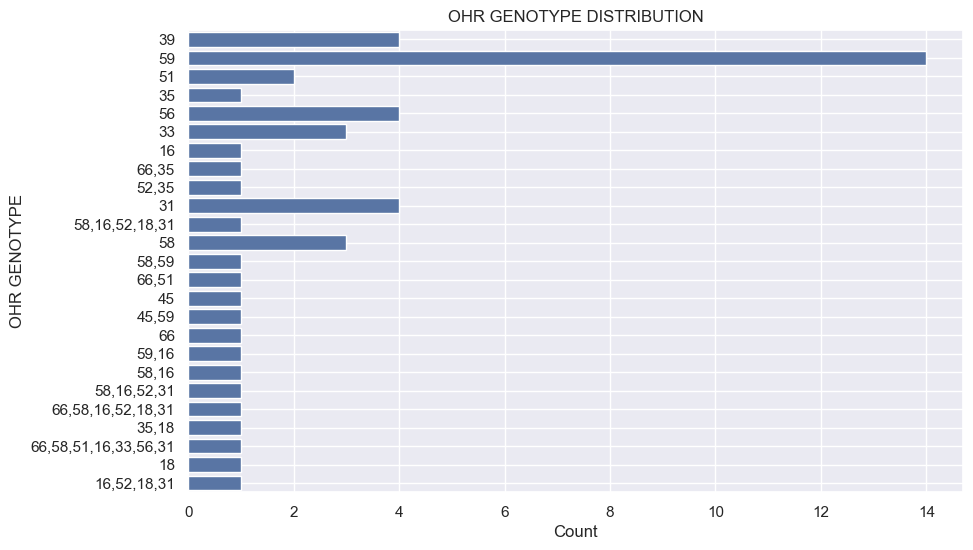

In [26]:
file_path = r"C:\Users\COMPAQ\Downloads\3 master sheet.csv"
data = pd.read_csv(file_path)
plt.figure(figsize=(10,6))
sns.countplot(y="OHR GENOTYPE", data=data)
plt.title("OHR GENOTYPE DISTRIBUTION")
plt.xlabel("Count")
plt.ylabel("OHR GENOTYPE")
plt.grid(True)
plt.show()

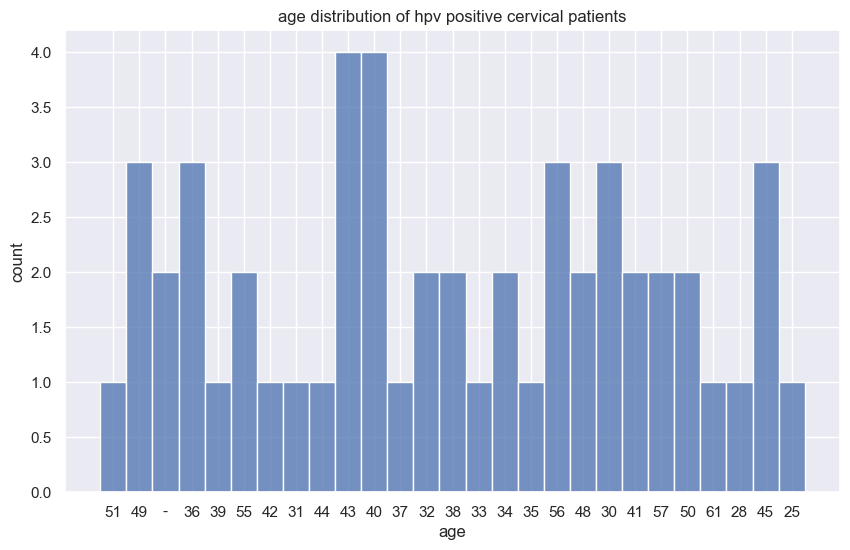

In [27]:
file_path = r"C:\Users\COMPAQ\Downloads\3 master sheet.csv"
data = pd.read_csv(file_path)
plt.figure(figsize=(10,6))
sns.histplot(x="Age", data=data)
plt.title("age distribution of hpv positive cervical patients")
plt.xlabel("age")
plt.ylabel("count")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

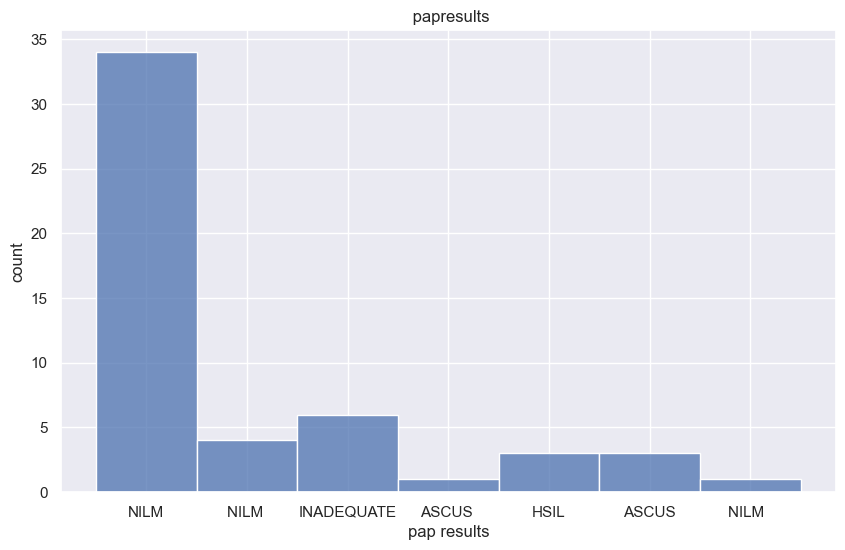

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(x="pap results",data= data,)
plt.title(" papresults")
plt.xlabel("pap results")
plt.ylabel("count")
plt.show()

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

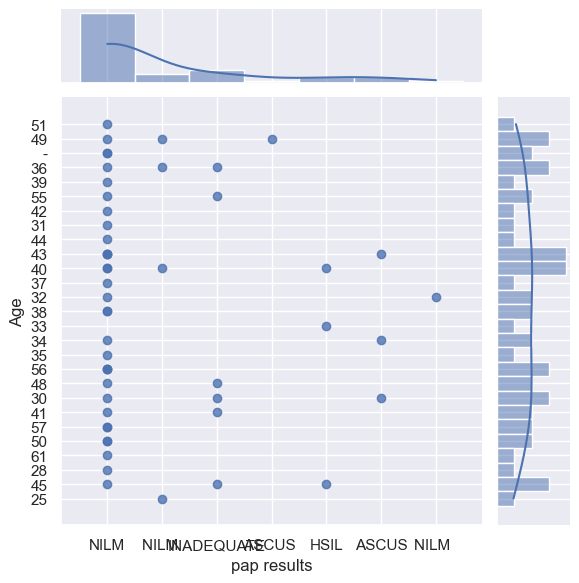

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

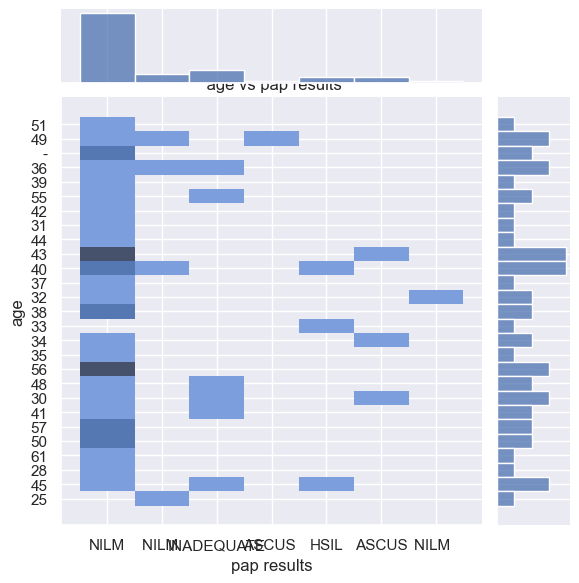

In [98]:
plt.figure(figsize=(12,12))
sns.jointplot(x="pap results",y="Age", data = df , kind ="hist" )
plt.title(" age vs pap results")
plt.xlabel("pap results")
plt.ylabel("age")
plt.show()

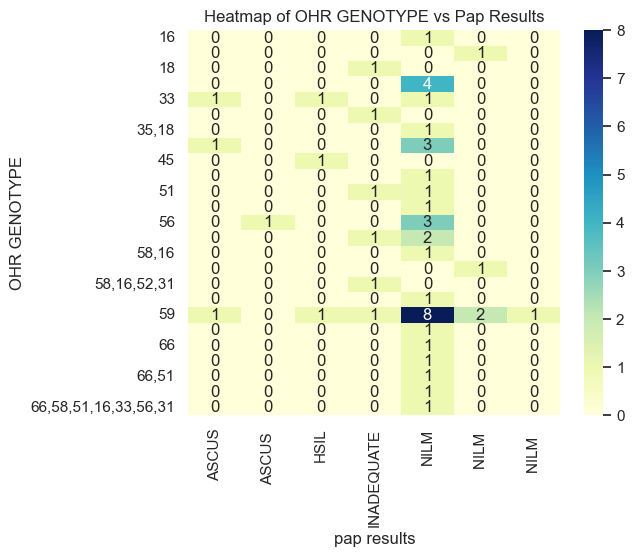

In [35]:
file_path = r"C:\Users\COMPAQ\Downloads\3 master sheet.csv"
df = pd.read_csv(file_path)
# Crosstab between OHR GENOTYPE and pap results
heatmap_data = pd.crosstab(df["OHR GENOTYPE"], df["pap results"])
# Plot heatmap 
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Heatmap of OHR GENOTYPE vs Pap Results")
plt.show()



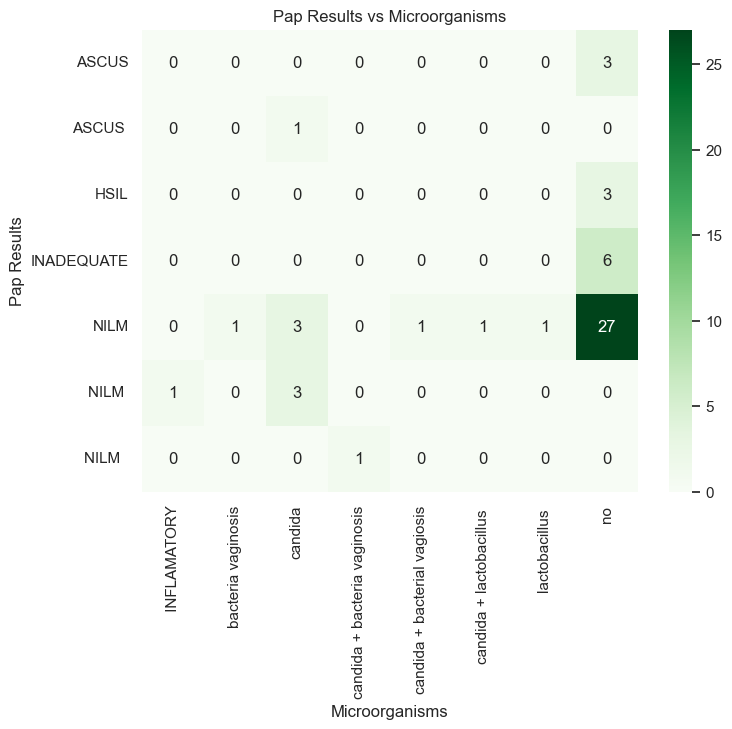

In [39]:
heatmap_data = pd.crosstab(df["pap results"], df["microprganisms present"])

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Greens")

plt.title("Pap Results vs Microorganisms")
plt.xlabel("Microorganisms")
plt.ylabel("Pap Results")
plt.show()

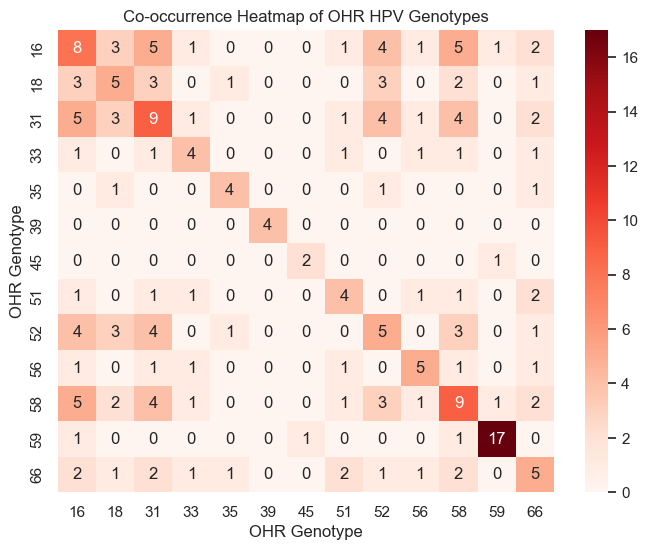

In [13]:
df_ohr = df.dropna(subset=["OHR GENOTYPE"])
#geneotypes splitting into seperate coloumn
df_ohr["OHR GENOTYPE"] = df_ohr["OHR GENOTYPE"].astype(str)
df_ohr["OHR GENOTYPE"] = df_ohr["OHR GENOTYPE"].str.split(",")
#converting int one hot tabble
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
ohr_matrix = mlb.fit_transform(df_ohr["OHR GENOTYPE"])

ohr_df = pd.DataFrame(
    ohr_matrix,
    columns=mlb.classes_
)

#cooccurence table making
co_occurrence = ohr_df.T.dot(ohr_df)

#plot 

plt.figure(figsize=(8,6))
sns.heatmap(
    co_occurrence,
    annot=True,
    fmt="d",
    cmap="Reds"
)

plt.title("Co-occurrence Heatmap of OHR HPV Genotypes")
plt.xlabel("OHR Genotype")
plt.ylabel("OHR Genotype")
plt.show()


In [43]:
# Create contingency table
table_pap_ohr = pd.crosstab(df["pap results"], df["OHR GENOTYPE"])

print("Contingency Table (Pap Results vs OHR Genotype):")
print(table_pap_ohr)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table_pap_ohr)

print("\nChi-square value:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Contingency Table (Pap Results vs OHR Genotype):
OHR GENOTYPE  16  16,52,18,31  18  31  33  35  35,18  39  45  45,59  ...  \
pap results                                                          ...   
ASCUS          0            0   0   0   1   0      0   1   0      0  ...   
ASCUS          0            0   0   0   0   0      0   0   0      0  ...   
HSIL           0            0   0   0   1   0      0   0   1      0  ...   
INADEQUATE     0            0   1   0   0   1      0   0   0      0  ...   
NILM           1            0   0   4   1   0      1   3   0      1  ...   
NILM           0            1   0   0   0   0      0   0   0      0  ...   
NILM           0            0   0   0   0   0      0   0   0      0  ...   

OHR GENOTYPE  58,16,52,18,31  58,16,52,31  58,59  59  59,16  66  66,35  66,51  \
pap results                                                                     
ASCUS                      0            0      0   1      0   0      0      0   
ASCUS                  

NameError: name 'chi2_contingency' is not defined

In [45]:
# Create Candida presence column
df["candida_present"] = df["microorganisms present"].str.contains(
    "candida", case=False, na=False
)

# Convert True/False to Yes/No
df["candida_present"] = df["candida_present"].map({True: "Yes", False: "No"})

# Contingency table
table_candida_pap = pd.crosstab(df["candida_present"], df["pap results"])

print("\nContingency Table (Candida vs Pap Results):")
print(table_candida_pap)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(table_candida_pap)

print("\nChi-square value:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


KeyError: 'microorganisms present'